In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [ ]:



df = pd.read_csv('/content/data_daily.csv', header=None, names=['Date', 'Value'], delimiter=',', skiprows=1)

df['Date'] = pd.to_datetime(df['Date'])


X = df['Date'].dt.dayofyear.values.reshape(-1, 1)
y = df['Value']


# Decision tree node class
class TreeNode:
    def __init__(self, feature_idx=None, threshold=None, left=None, right=None, value=None):
        self.feature_idx = feature_idx  # Index of feature to split on
        self.threshold = threshold      # Threshold value for the split
        self.left = left                # Left subtree
        self.right = right              # Right subtree
        self.value = value              # Predicted value for leaf nodes

# Function to calculate the mean squared error
def mean_squared_error(y):
    if len(y) == 0:
        return 0
    mean = np.mean(y)
    return np.mean((y - mean) ** 2)

# Function to find the best split for a node
def find_best_split(X, y):
    m, n = X.shape
    if m <= 1:
        return None, None
    parent_mse = mean_squared_error(y)
    best_mse = float('inf')
    best_idx, best_thr = None, None
    for idx in range(n):
        thresholds, indices = zip(*sorted(zip(X[:, idx], range(m))))
        left = [y[i] for i in indices]
        right = []
        for i in range(m):
            left_mse = mean_squared_error(left)
            right_mse = mean_squared_error(right)
            mse = (len(left) / m) * left_mse + (len(right) / m) * right_mse
            if mse < best_mse:
                best_idx, best_thr = idx, thresholds[i]
                best_mse = mse
            if i < m - 1:
                left.append(y[indices[i]])
                right.append(y[indices[i]])
    return best_idx, best_thr

# Function to build a decision tree
def build_tree(X, y, depth=0, max_depth=None):
    if depth == max_depth or mean_squared_error(y) == 0:
        return TreeNode(value=np.mean(y))
    idx, thr = find_best_split(X, y)
    if idx is None:
        return TreeNode(value=np.mean(y))
    left_mask = X[:, idx] < thr
    X_left, y_left = X[left_mask], y[left_mask]
    X_right, y_right = X[~left_mask], y[~left_mask]
    left = build_tree(X_left, y_left, depth + 1, max_depth)
    right = build_tree(X_right, y_right, depth + 1, max_depth)
    return TreeNode(feature_idx=idx, threshold=thr, left=left, right=right)

# Function to make predictions with the decision tree
def predict_tree(node, X):
    if node.value is not None:
        return node.value
    if X[node.feature_idx] < node.threshold:
        return predict_tree(node.left, X)
    else:
        return predict_tree(node.right, X)

# Build the decision tree
tree = build_tree(X, y, max_depth=5)

# Make predictions
predictions = [predict_tree(tree, np.array([x])) for x in X]
print(predictions)


[8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052054795, 8826566.052

In [ ]:
plt.plot(, predicted_values, label='Predicted Values', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Predicted Values for {next_year} (Random Forest Regressor)')
plt.legend()
plt.grid()
plt.show()


NameError: ignored

<ipython-input-42-7203b9982ec9>:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-42-7203b9982ec9>:11: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('/content/data_daily.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)


predicted=9208083.950057, expected=9384023.000000
predicted=9325929.247400, expected=9474742.000000
predicted=9452919.860328, expected=9189054.000000
predicted=9241856.114430, expected=9167277.000000
predicted=9178286.752795, expected=9123056.000000
predicted=9128489.723190, expected=9251321.000000
predicted=9227864.572784, expected=9377700.000000
predicted=9357416.504254, expected=9782022.000000
predicted=9712379.007824, expected=8930331.000000
predicted=9041698.920008, expected=9718666.000000
predicted=9639927.147035, expected=9262001.000000
predicted=9293633.454398, expected=9095889.000000
predicted=9130815.928305, expected=9364629.000000
predicted=9360987.369877, expected=9508131.000000
predicted=9438506.078068, expected=9264013.000000
predicted=9308651.698390, expected=9461281.000000
predicted=9451567.824171, expected=9032235.000000
predicted=9085864.096085, expected=9574777.000000
predicted=9501022.903924, expected=9189740.000000
predicted=9233136.325777, expected=9508023.000000


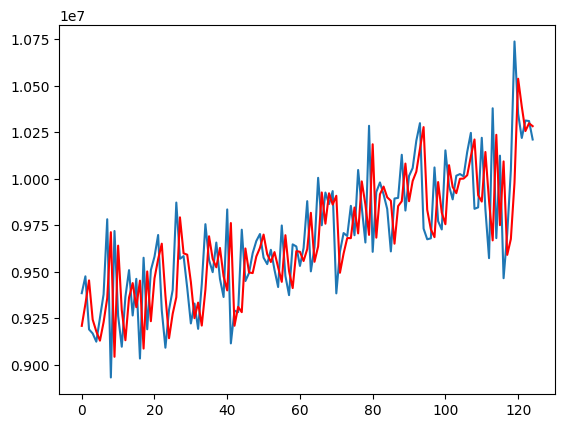

In [ ]:
# evaluate an ARIMA model using a walk-forward validation
from pandas import read_csv
from pandas import datetime
from matplotlib import pyplot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt
# load dataset
def parser(x):
 return datetime.strptime(x, '%Y-%m-%d')
series = read_csv('/content/data_daily.csv', header=0, index_col=0, parse_dates=True, squeeze=True, date_parser=parser)
series.index = series.index.to_period('M')
# split into train and test sets
X = series.values
size = int(len(X) * 0.66)
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
 model = ARIMA(history, order=(5,1,0))
 model_fit = model.fit()
 output = model_fit.forecast()
 yhat = output[0]
 predictions.append(yhat)
 obs = test[t]
 history.append(obs)
 print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

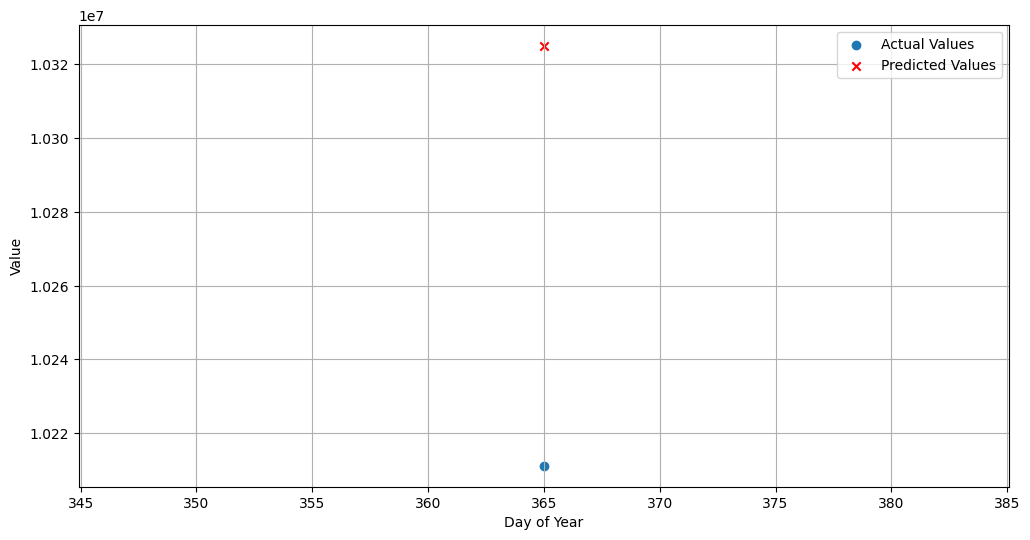

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt


df = pd.read_csv('/content/data_daily.csv', header=None, names=['Date', 'Value'], delimiter=',', skiprows=1)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])


data_2021 = df[df['Date'].dt.year == 2021]


data_2021 = data_2021.sort_values(by='Date')

X = data_2021['Date'].dt.dayofyear.values.reshape(-1, 1)
y = data_2021['Value']


X_train = X[:-1]  # Use all data except the last 10 days for training
y_train = y[:-1]
X_test = X[-1:]  # Use the last 10 days for testing
y_test = y[-1:]

model = RandomForestRegressor(n_estimators=10, max_depth=6, min_samples_split=2, random_state=10)


model.fit(X_train, y_train)

predicted_values = model.predict(X_test)


plt.figure(figsize=(12, 6))
plt.scatter(X_test, y_test, label='Actual Values', marker='o')
plt.scatter(X_test, predicted_values, label='Predicted Values', marker='x', color='red')
plt.xlabel('Day of Year')
plt.ylabel('Value')
plt.legend()
plt.grid()
plt.show()


In [ ]:
!pip install statsmodels


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


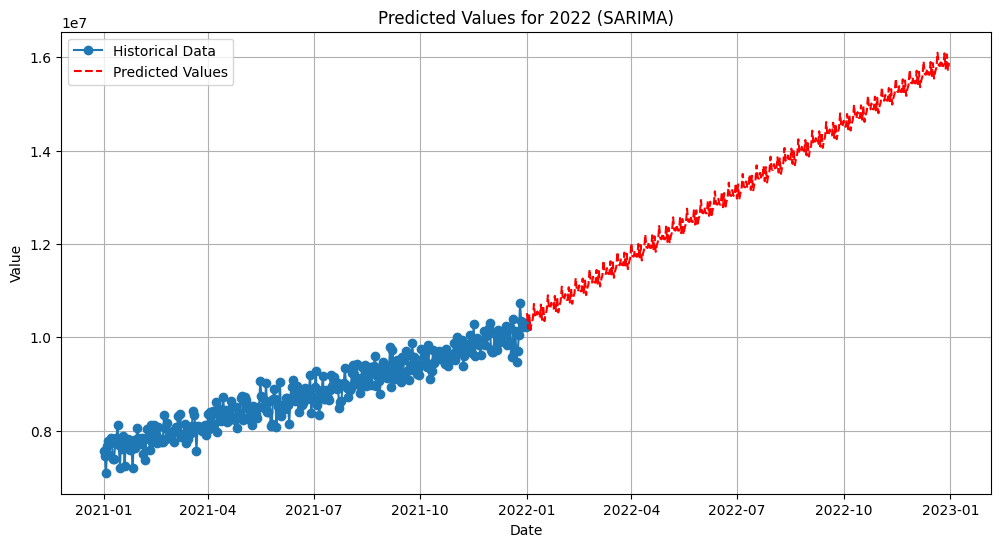

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Load the CSV data without column headers and specify the delimiter
# Replace 'your_data.csv' with the actual filename
df = pd.read_csv('/content/data_daily.csv', header=None, names=['Date', 'Value'], delimiter=',', skiprows=1)

# Convert the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'])

# Set 'Date' as the index of the DataFrame
df.set_index('Date', inplace=True)

# Define the SARIMA model (Seasonal ARIMA)
order = (5, 1, 0)  # (p, d, q) for ARIMA
seasonal_order = (0, 1, 1, 12)  # (P, D, Q, S) for seasonal component (assuming seasonality of 12 months)
model = SARIMAX(df['Value'], order=order, seasonal_order=seasonal_order)

# Fit the model to the historical data
results = model.fit()

# Predict data for the next year (365 days)
next_year = 2022  # Change this to the desired year
predicted_values = results.get_forecast(steps=365)

# Extract predicted values and dates
predicted_mean = predicted_values.predicted_mean
forecast_dates = pd.date_range(start=f'{next_year}-01-01', periods=365)

# Plot the historical data and the predicted values
plt.figure(figsize=(12, 6))
plt.plot(df.index, df['Value'], label='Historical Data', marker='o')
plt.plot(forecast_dates, predicted_mean, label='Predicted Values', linestyle='--', color='red')
plt.xlabel('Date')
plt.ylabel('Value')
plt.title(f'Predicted Values for {next_year} (SARIMA)')
plt.legend()
plt.grid()
plt.show()


In [ ]:

df = pd.read_csv('df.csv',parse_dates=True,index_col='date')
df = pd.DataFrame(df.groupby(df.index.strftime('%Y-%m')).sum()['amount'])
df.columns=['Value']

In [ ]:

df_testing = pd.DataFrame(np.log(df.Value).diff().diff(12))
adf_check(df_testing.Value.dropna())

Augmented Dickey-Fuller Test:
ADF Test Statistic : -5.225226609716364
p-value : 7.807176920050943e-06
Number of Lags Used : 3
Number of Observations Used : 55
strong evidence against the null hypothesis, reject the null hypothesis. Data has no unit root and is stationary


In [ ]:

def AR(p,df):
  df_temp = df

  #Generating the lagged p terms
  for i in range(1,p+1):
    df_temp['Shifted_values_%d' % i ] = df_temp['Value'].shift(i)

  train_size = (int)(0.8 * df_temp.shape[0])

  #Breaking data set into test and training
  df_train = pd.DataFrame(df_temp[0:train_size])
  df_test = pd.DataFrame(df_temp[train_size:df.shape[0]])

  df_train_2 = df_train.dropna()
  #X contains the lagged values ,hence we skip the first column
  X_train = df_train_2.iloc[:,1:].values.reshape(-1,p)
  #Y contains the value,it is the first column
  y_train = df_train_2.iloc[:,0].values.reshape(-1,1)

  #Running linear regression to generate the coefficents of lagged terms
  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  df_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # df_train_2[['Value','Predicted_Values']].plot()

  X_test = df_test.iloc[:,1:].values.reshape(-1,p)
  df_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  # df_test[['Value','Predicted_Values']].plot()

  RMSE = np.sqrt(mean_squared_error(df_test['Value'], df_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of p : ",p)
  return [df_train_2,df_test,theta,intercept,RMSE]
Part 3 : Moving Average
Now that we have generated

In [ ]:
df_c = pd.concat([df_train,df_test])
res = pd.DataFrame()
res['Residuals'] = df_c.Value - df_c.Predicted_Values

In [ ]:
def MA(q,res):

  for i in range(1,q+1):
    res['Shifted_values_%d' % i ] = res['Residuals'].shift(i)

  train_size = (int)(0.8 * res.shape[0])

  res_train = pd.DataFrame(res[0:train_size])
  res_test = pd.DataFrame(res[train_size:res.shape[0]])

  res_train_2 = res_train.dropna()
  X_train = res_train_2.iloc[:,1:].values.reshape(-1,q)
  y_train = res_train_2.iloc[:,0].values.reshape(-1,1)

  from sklearn.linear_model import LinearRegression
  lr = LinearRegression()
  lr.fit(X_train,y_train)

  theta  = lr.coef_.T
  intercept = lr.intercept_
  res_train_2['Predicted_Values'] = X_train.dot(lr.coef_.T) + lr.intercept_
  # res_train_2[['Residuals','Predicted_Values']].plot()

  X_test = res_test.iloc[:,1:].values.reshape(-1,q)
  res_test['Predicted_Values'] = X_test.dot(lr.coef_.T) + lr.intercept_
  res_test[['Residuals','Predicted_Values']].plot()

  from sklearn.metrics import mean_squared_error
  RMSE = np.sqrt(mean_squared_error(res_test['Residuals'], res_test['Predicted_Values']))

  print("The RMSE is :", RMSE,", Value of q : ",q)
  return [res_train_2,res_test,theta,intercept,RMSE]

In [ ]:
df_c.Value += np.log(df).shift(1).Value
df_c.Value += np.log(df).diff().shift(12).Value
df_c.Predicted_Values += np.log(df).shift(1).Value
df_c.Predicted_Values += np.log(df).diff().shift(12).Value
df_c.Value = np.exp(df_c.Value)
df_c.Predicted_Values = np.exp(df_c.Predicted_Values)